In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

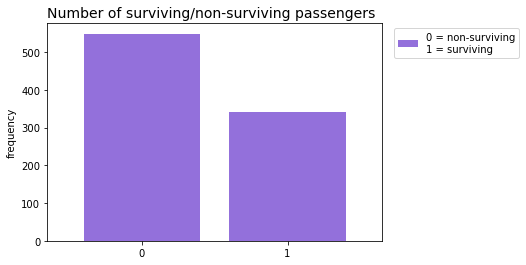

In [4]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

df['Survived'].value_counts().plot(kind='bar', width=0.8, color='mediumpurple')
plt.title('Number of surviving/non-surviving passengers', fontsize=14, loc='left')
plt.ylabel('frequency')
plt.xlabel('')
# xachsenbeschriftung drehen
plt.xticks(rotation=0)
# legend -- i still need to check how to loose the square, maybe better option: rename 
plt.legend({'0 = non-surviving\n1 = surviving'}, bbox_to_anchor=(1.02, 1), loc=2)



In [5]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

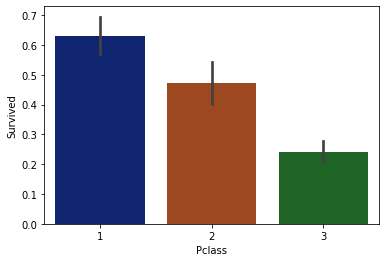

In [6]:
# Calculate the proportion of surviving 1st class passengers with regards to the total 
# number of 1st class passengers.
sns.barplot(data=df, x='Pclass', y='Survived', palette='dark')
#sns.xlabel('Class')

In [7]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class pax

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

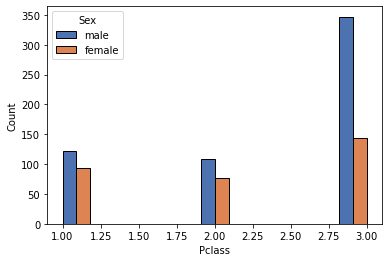

In [8]:
sns.histplot(data=df, x='Pclass', hue='Sex', alpha=1, multiple='dodge', palette='deep')

# how does it work with xValue
#Groupby_TwoCol_Plot(descript,'Sex','Pclass', color_palette=('blueviolet', 'steelblue'),
#                   plt_style = 'seaborn-ticks', custom_title='Gender per Class')

In [9]:
# Create a histogram showing the age distribution of pax. Compare surviving/non-surviving pax

<AxesSubplot:xlabel='Age', ylabel='Count'>

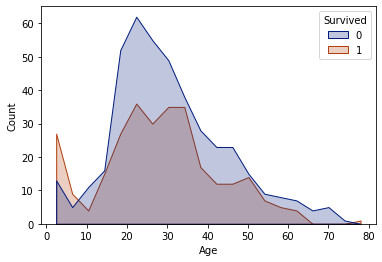

In [10]:
sns.histplot(data=df, x='Age', hue='Survived', element='poly', palette='dark')
# rename values@legend

In [11]:
# Calculate the mean age for survived and drowned passengers separately.

In [12]:
mean_age=df.groupby(['Survived'])['Age'].mean()
mean_age


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [13]:
# Replace missing age values by the mean age.

In [14]:
# df.info()oder
df.isnull().sum()
# See MV of Age var

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
def replace_MV_age(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Survived']]
    else:
        return row['Age']
    
df['Survived'].apply(replace_MV_age)

df.isnull().sum()


TypeError: 'int' object is not subscriptable

In [ ]:
# df = df.apply(replace_MV_age, axis=1)    
# df.info()